# CQPS

\begin{equation}
H = 4E_C \left(\hat{n} - n_g \right)
\end{equation}

\begin{equation}
   \hat{H} = 4E_C(n - n_g)^2-2E_{J0}\cos(\frac{\pi\Phi}{\Phi_0})\cos \delta
\end{equation}

<img src="data/2021-02-05_cqps/extracted-plots.png"/>

In [1]:
%matplotlib notebook
import logging

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("my_official")

from quantum_builder import QuantumBuilder

In [2]:
SIMULATION_PARAMETERS = {
    "number_of_states": 7,
    "number_of_levels_to_simulate": 2
}
QUBIT_PARAMETERS = {
    "ES": 10,
    "inductive_loop_squares": 30, # 30 140x140nm squares
     **SIMULATION_PARAMETERS
}

cqps_qubit = QuantumBuilder.build_cqps_qubit(
    QUBIT_PARAMETERS, logging_level=logging.INFO,
)

FLUX_NUMBER = np.linspace(-2, 2, 1000)

cqps_qubit_constant_manager:68:print_constants
⮑  ⚛ System setup with the following parameters (can choose to override them):

Energies
EL:                                               72.05 (GHz)
ES:                                               10.00 (GHz)

Raw Parameters
number_of_states:                                 7
inductive_loop_squares:                           30.00 (100x100nm²)

Derived Parameters
inductance:                                       45.00 (nH)




<IPython.core.display.Javascript object>


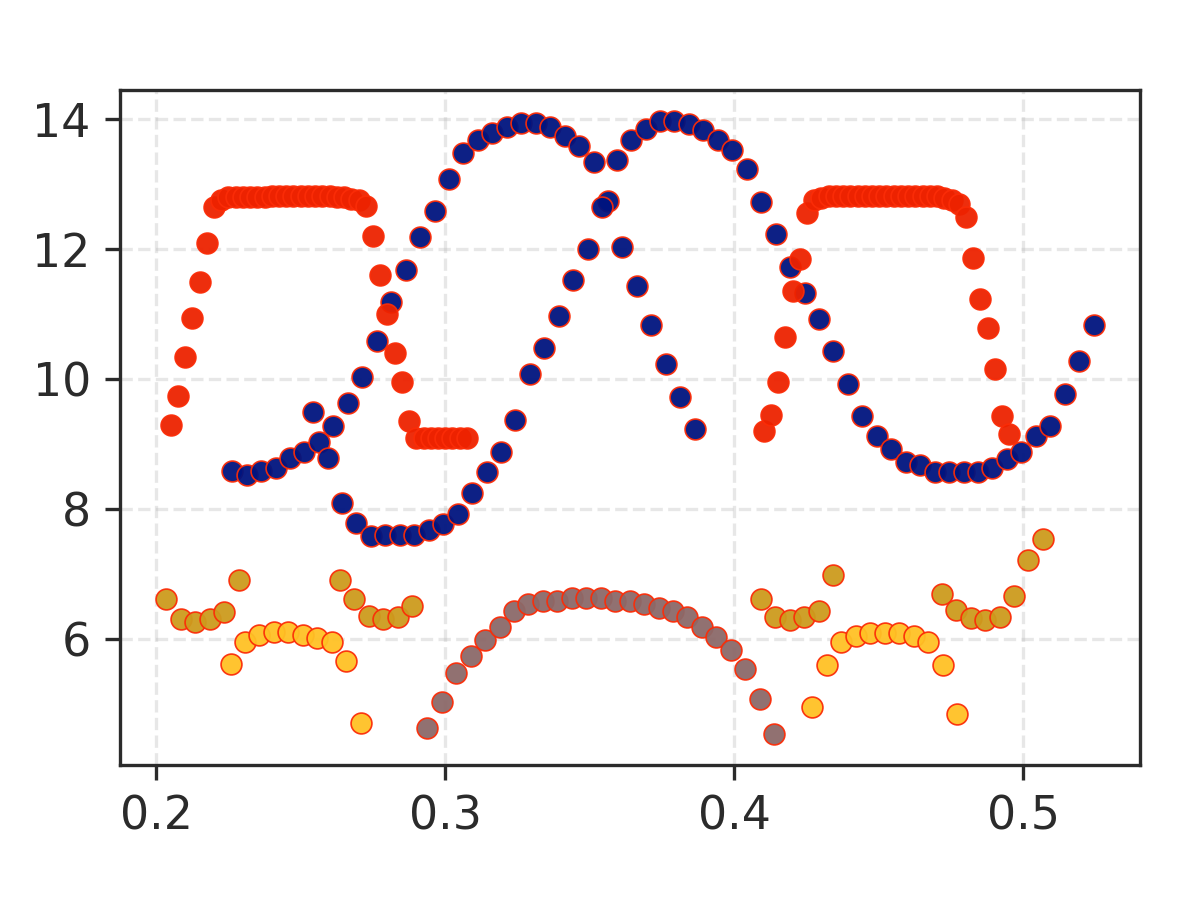

In [3]:
# mA vs GHz
BASE_NAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/qubit_simulations/data/2021-02-05_cqps/TiN95_TwinQ_3Feb'21_mfield_1-2-3_comb"
FILES = {
    "A": "#00147f",
    "B": "#ed2200",     # dark red (red2)
    "C": "#ffc125",      # orange,
    "D": "#8b6969",
    "E": "#cd9b1d"
}
data = {}


fig, ax = plt.subplots(1, 1, figsize=(4, 3))
for series in FILES.keys():
    data[series] = np.loadtxt(f"{BASE_NAME}-{series}.txt")
    
    ax.plot(data[series][:, 0], data[series][:, 1],
            marker="o", 
            color=FILES[series],
            markeredgecolor="#fb2c07", 
            markeredgewidth="0.4", 
            markersize=5, 
            alpha=0.95,
            linestyle="")

In [4]:
series = "A"
data = np.loadtxt(f"{BASE_NAME}-{series}.txt")

cqps_qubit_constant_manager:57:override_parameters
⮑  Overriding to the following values:
EL:       10
ES:       10


cqps_qubit_simulator:55:simulate
⮑  💻 Running simulation

cqps_qubit_simulator:96:simulate
⮑  💻 Simulation completed



<IPython.core.display.Javascript object>


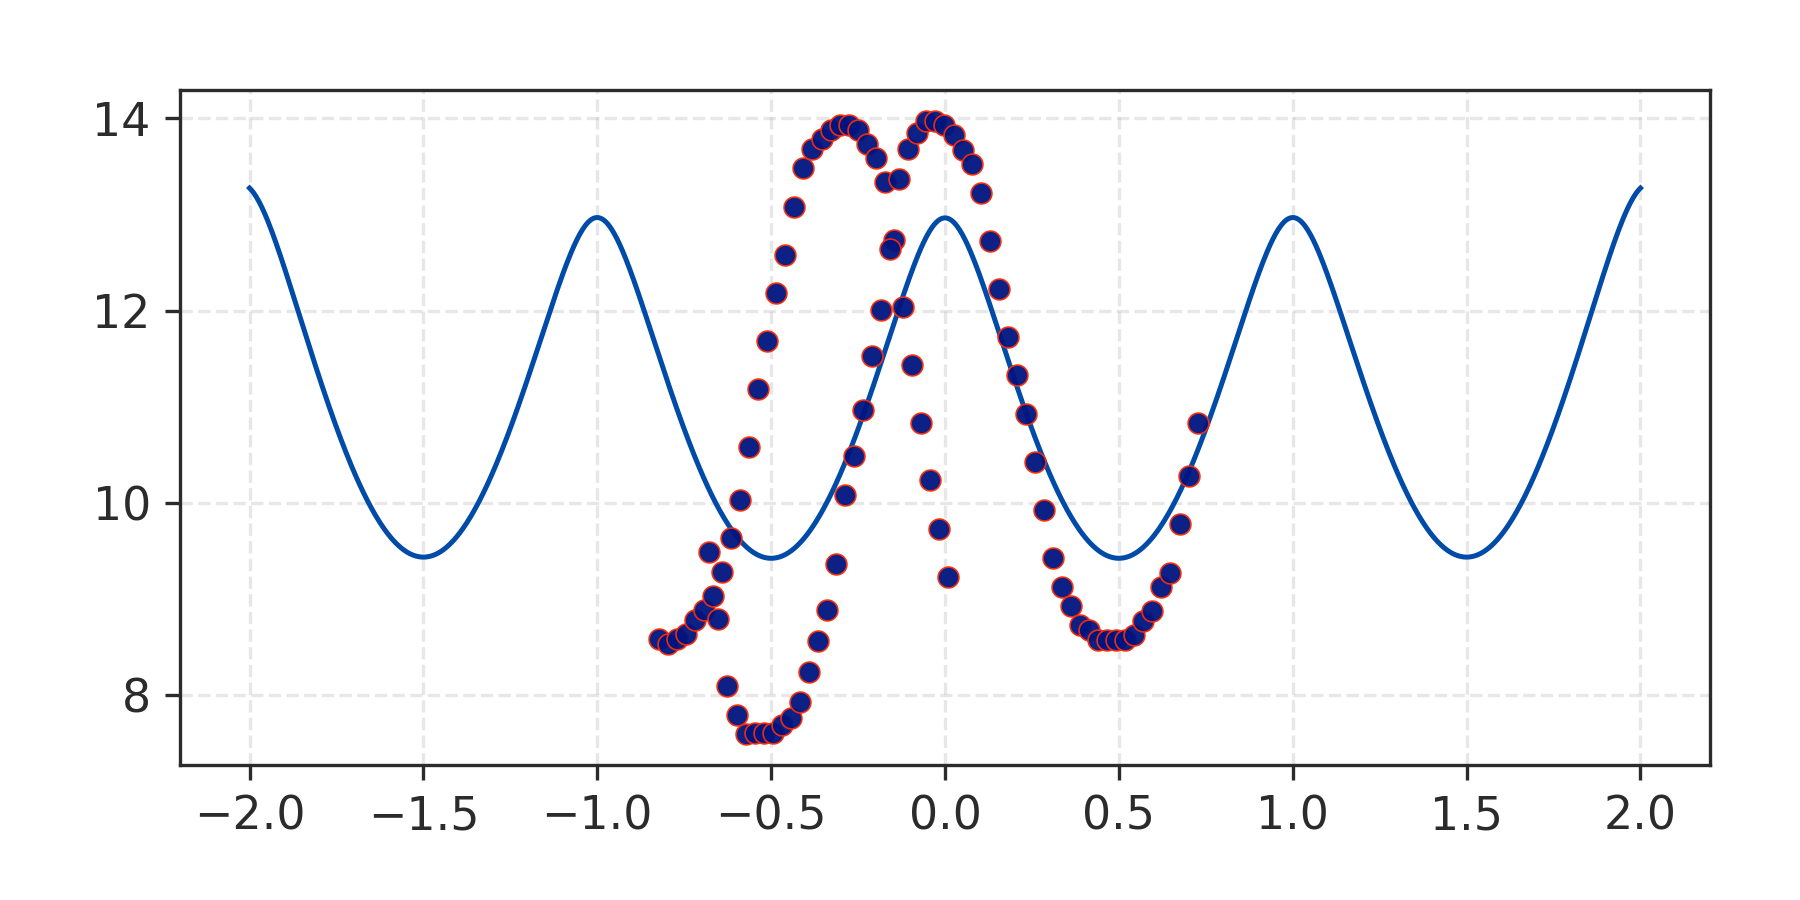

In [5]:
EL = 10
ES = 10
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)

scaling = 5.2
offset = 2

simulation = cqps_qubit.run_simulation(FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])


fig, ax = plt.subplots(1, 1, figsize=(6, 3))    
ax.plot(FLUX_NUMBER, simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0])
ax.plot(data[:, 0] * scaling - offset, data[:, 1],
    marker="o", 
    color=FILES[series],
    markeredgecolor="#fb2c07", 
    markeredgewidth="0.4", 
    markersize=5, 
    alpha=0.95,
    linestyle="")

<IPython.core.display.Javascript object>


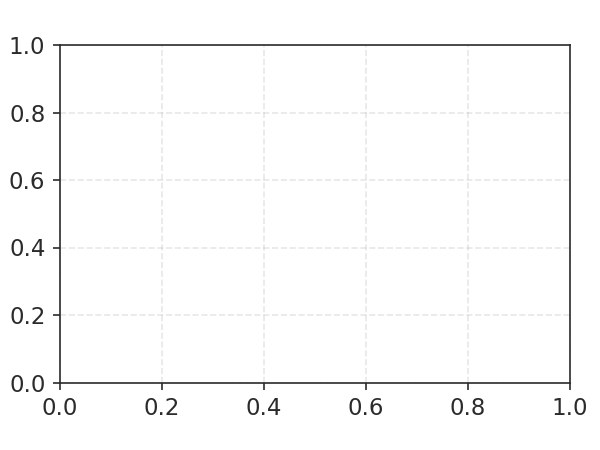

NameError: name 'MY_COLOURS' is not defined

In [4]:
from experimental_analysis.two_tone_data import TwoToneData
from common import plotter

two_tone_data = TwoToneData()
# 1 - load the experminetal data
two_tone_data.load_data(base_file_name="data/Qubit15_5JJ_Q2", 
                       offset=0.125,
                       period=0.7)

# 2 - plot simulation and spectrum
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(two_tone_data["flux_12"], two_tone_data["spectrum_12"],
        marker="o", 
        color=MY_COLOURS["DarkBlue"],
        markeredgecolor="C2", 
        markeredgewidth="0.4", markersize=4, alpha=0.95, 
        linestyle="")
ax.plot(two_tone_data["flux_23"], two_tone_data["spectrum_23"],
        marker="o", 
        color=MY_COLOURS["DarkRed"],
        markeredgecolor="#fb2c07", 
        markeredgewidth="0.4", 
        markersize=5, 
        alpha=0.95,
        linestyle="")

ax.plot(twin_qubit.flux_list, twin_qubit.simulations["1-2"], color="C0", linewidth=0.9)
ax.plot(twin_qubit.flux_list, twin_qubit.simulations["2-3"], color="C4", linewidth=0.9)
ax.set_xlim([-3, 3])
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_ylim([8, 20])
ax.set_xlabel("Normalized Magnetic Flux ($\Phi/\Phi_0$)", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)    
plt.tight_layout()

plotter.save_onto_white_background(ax, "./output/fitting_spectrum", "svg")